In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [244]:
!pwd

/content


# Creating the data frame

In [245]:
price_df = pd.read_csv('/car_prices_w_prices_scaled.csv', index_col=0)

In [246]:
features_df = pd.read_csv('/scaled_cleaned.csv')

## Merging features and prices

In [247]:
merged_df = price_df.merge(features_df, left_on="car_code", right_on="car_code", how="left")

In [248]:
merged_df.rename(columns=lambda x: x.strip(), inplace=True)

In [249]:
merged_df[merged_df.index == 87887 ]

,car_code,car_manufacturer,car_model,car_model_year,Year_x,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled,...,Maximum power,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm
87887,441,Audi,A8 4.2 V8 Quattro,2003,1,0.749652,0.961737,0.917069,2004,-0.836267,...,0.167403,0.523084,0.033011,0.0,0.545455,0.062035,0.625,0.0,0.0,0.0


### making model first name feature

In [250]:
def take_first_word(word):
    return word.split(" ")[0]

merged_df["car_model_small"] = merged_df["car_model"].map(take_first_word)
merged_df.drop(columns="car_model", inplace=True)

In [251]:
# Including the next price sd scaled target
merged_df["Next_Price_sd_scaled"] = merged_df.sort_values(["car_code","Year_x"] ).groupby('car_code')["Price_sd_scaled"].shift(-1)
merged_df = merged_df[merged_df["Next_Price_sd_scaled"].isnull() == False]
#merged_df.drop(price_df.tail(1).index,inplace=True)

In [252]:
#merged_df[merged_df["car_code"] == 442].sort_values(["car_code","Year_x"] )

In [253]:
merged_df[merged_df["car_code"] == 5152].sort_values(["car_code","Year_x"] )

,car_code,car_manufacturer,car_model_year,Year_x,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled,Propulsion_Combustion,...,Trunk,USB connection,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm,car_model_small,Next_Price_sd_scaled
73284,5152,Volkswagen,2014,1,0.789727,0.933229,0.917069,2015,0.467099,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,1.027799
67134,5152,Volkswagen,2014,2,0.933229,0.921536,0.916243,2016,1.027799,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,0.305076
59943,5152,Volkswagen,2014,3,0.921536,0.953685,0.922014,2017,0.305076,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,-0.014085
51642,5152,Volkswagen,2014,4,0.953685,0.884420,0.930608,2018,-0.014085,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,-0.465593
42354,5152,Volkswagen,2014,5,0.884420,0.918853,0.941001,2019,-0.465593,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,0.301808
32124,5152,Volkswagen,2014,6,0.918853,0.765800,0.955932,2020,0.301808,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,-2.925534
20426,5152,Volkswagen,2014,7,0.765800,1.027662,0.960582,2021,-2.925534,1.0,...,0.032011,1.0,0.545455,0.168734,0.821429,1.0,1.0,1.0,Passat,-1.424685


## Selected features

In [254]:
merged_df.columns

Index(['car_code', 'car_manufacturer', 'car_model_year', 'Year_x', 'Price_YoY',
       'Next_YoY_Price', 'Next_YoY_Pr_Pred', 'calendar_year',
       'Price_sd_scaled', 'Propulsion_Combustion',
       ...
       'Trunk', 'USB connection', 'Gear speed transmissions', 'Urban',
       'Year_y', 'Radio', 'Folding rear seat', 'Perimeter anti theft alarm',
       'car_model_small', 'Next_Price_sd_scaled'],
      dtype='object', length=111)

In [255]:
columns_to_correlate = ['car_model_year' , 'Year_x' , 'Price_YoY' ,
                        'Next_YoY_Price' , 'Next_YoY_Pr_Pred' , 'calendar_year' , 'Price_sd_scaled' , 'Acceleration' , 'Length' , 'Maximum torque' , 'Width' ,
                        'Compression ratio' , 'CNW Ranking' , 'Weight/Torque' , 'Guarantee' , 'Drag coefficient' , 'Height' , 'Valves per cylinder' ,
                        'Specific torque' , 'Minimum height from the ground' , 'Piston course' , 'Weight' , 'Price R' , 'Front gauge' , 'Weight/power' ,
                        'Displacement' , 'Max power regime.' , 'Turns diameter' , 'Cylinder diameter' , 'Rear gauge' , 'Length between the axis' , 'Maximum speed' ,
                        'Fuel tank' , 'Devaluation' , 'Road consumption' , 'Max torque regime' , 'Car payload' , 'Specific power' , 'CNW Index' , 'Reader score' ,
                        'Sidewall height' , 'Doors' , 'Maximum power' , 'Unit displacement' , 'Trunk' , 'Gear speed transmissions' , 'Urban' , 'Year_y' , 'car_model_small' , 'Next_Price_sd_scaled']

In [256]:
for column in merged_df.columns:
  if merged_df[column].nunique() > 2:
    #print(column)
    pass

<ipython-input-257-8a9212d68129>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(X_view).corr(), cmap='coolwarm')


<Axes: >

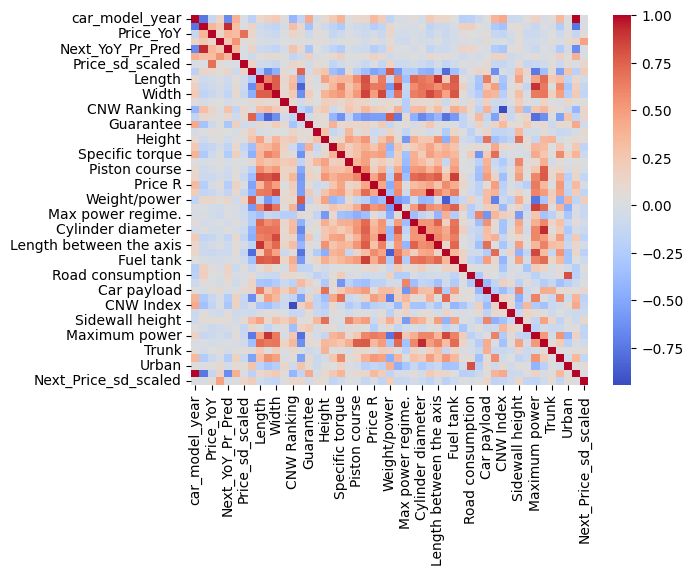

In [257]:
X_view = pd.DataFrame(merged_df, columns=columns_to_correlate)

X_view
sns.heatmap(pd.DataFrame(X_view).corr(), cmap='coolwarm')

In [258]:
columns_to_drop = ['Year_y',
'Next_YoY_Pr_Pred',
'Length between the axis',
'Weight',
'Maximum power',
'Displacement',
'Rear gauge',
'Front gauge',
'Unit displacement',
"Maximum torque",
"Weight/power",
"CNW Ranking",
"CNW Index",
"Maximum speed" #we keep acceleration only
]

In [259]:


corr_matrix = pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr()
corr_matrix
melt = corr_matrix.melt(id_vars=corr_matrix.index.name, value_vars =corr_matrix.index.name )
melt = melt[melt["value"] > 0.75][melt["value"] < 1]
high_corr = melt.variable.unique()

high_corr_matrix = pd.DataFrame(X_view[high_corr]).corr()
high_corr_matrix

<ipython-input-259-0c3f657b22ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr()
<ipython-input-259-0c3f657b22ae>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  melt = melt[melt["value"] > 0.75][melt["value"] < 1]


,Length,Width,Fuel tank,Road consumption,Urban
Length,1.000000,0.760731,0.774432,-0.056301,-0.171034
Width,0.760731,1.000000,0.790217,-0.109699,-0.224370
Fuel tank,0.774432,0.790217,1.000000,-0.156486,-0.316132
Road consumption,-0.056301,-0.109699,-0.156486,1.000000,0.814196
Urban,-0.171034,-0.224370,-0.316132,0.814196,1.000000


<ipython-input-260-cfdd300f834f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr(), cmap='coolwarm')


<Axes: >

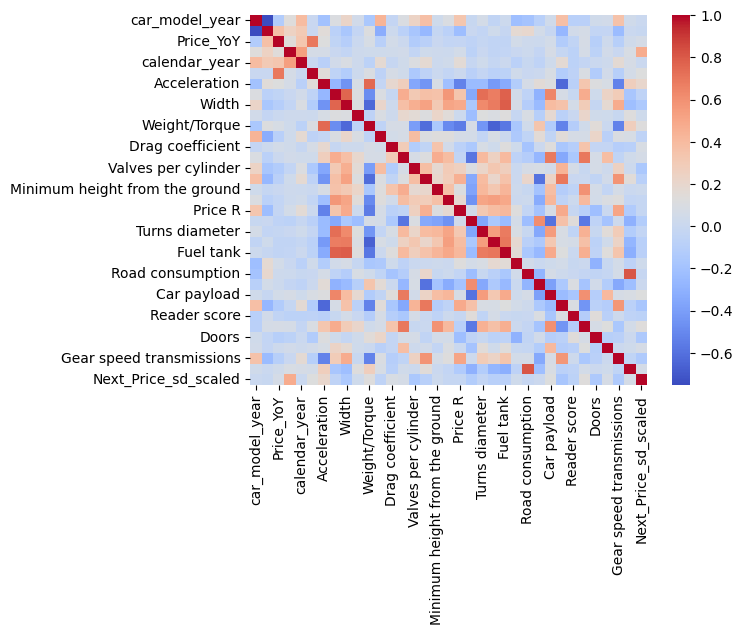

In [260]:
sns.heatmap(pd.DataFrame(X_view.drop(columns=columns_to_drop)).corr(), cmap='coolwarm')

# Model preprocessor

In [261]:
import numpy as np
from sklearn.model_selection import train_test_split

In [262]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

# Model X and y - train test validade sets

In [263]:
# include prev 2 years of prices on X

merged_df_tmp = merged_df
merged_df_tmp["prev_1_Price_YoY"] = merged_df_tmp.sort_values(["car_code","Year_x"] ).groupby('car_code')["Price_YoY"].shift(1)

merged_df_tmp["prev_2_Price_YoY"] = merged_df_tmp.sort_values(["car_code","Year_x"] ).groupby('car_code')["Price_YoY"].shift(2)

In [264]:
X = merged_df_tmp.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price', 'Next_YoY_Pr_Pred',
       'Next_Price_sd_scaled' ])
X.columns
columns_to_drop

['Year_y',
 'Next_YoY_Pr_Pred',
 'Length between the axis',
 'Weight',
 'Maximum power',
 'Displacement',
 'Rear gauge',
 'Front gauge',
 'Unit displacement',
 'Maximum torque',
 'Weight/power',
 'CNW Ranking',
 'CNW Index',
 'Maximum speed']

In [265]:
X = merged_df_tmp.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price', 'Next_YoY_Pr_Pred',
       'Next_Price_sd_scaled' ])
columns_to_drop_tmp = columns_to_drop.remove('Next_YoY_Pr_Pred')
X = X.drop(columns=columns_to_drop )



In [266]:
X.shape

(73320, 95)

In [267]:

num_feat = [feature for feature in X.select_dtypes(include='number').columns.tolist() if feature not in ["Year_x", "calendar_year" , "car_code", "car_model_year" , "CNW Index", "CNW Ranking", "CNW Ranking", "Devaluation" ] ]
#num_feat
categorical_features = list(merged_df.select_dtypes(include='object').columns)
categorical_features = [] # intentionaly removing these features ['car_manufacturer', 'car_model_small']
year_features = ["Year_x", "calendar_year" ]


In [268]:
#reiviewd after permutation analysis --> see heredown
num_feat = ['Price R',
'Price_YoY',
'Car gearbox_Manual',
'Length',
'Settings_Pickup truck',
'Width',
'Sidewall height',
'Price_sd_scaled',
'Car payload',
'Height',
'Doors',
'prev_1_Price_YoY',
'Acceleration',
'Trunk',
'Specific power',
'prev_2_Price_YoY',
'Cylinder diameter',
'Fuel tank',
'Weight/Torque',
'Specific torque',
'Max torque regime',
'Piston course',
'Fuel_Gasoline',
'Provenance'
]

In [269]:

# Impute then scale numerical values:
num_inputer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean"))
    #('standard_scaler', StandardScaler())
])

standard_scaler = Pipeline([
    #('imputer', SimpleImputer(strategy="mean"))
    ('standard_scaler', StandardScaler())
])




# Encode categorical values
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)




# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, categorical_features ), #,
    ('standard_scaler', standard_scaler, year_features ) ,
    ('num_inputer', num_inputer, num_feat  )  #numerical_columns
])


In [270]:
y = merged_df['Next_YoY_Price']
#y = merged_df["Next_Price_sd_scaled"]
y = y.fillna(0)

In [271]:
from sklearn.model_selection import train_test_split

X = preprocessor.fit_transform(X)  #keep in mind, is not procedural good

# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

#  XG Boost Model

In [272]:
from xgboost import XGBRegressor

In [273]:

#X_train_transformed = preprocessor.fit_transform(X_train)
#X_val_transformed = preprocessor.transform(X_val)
X.shape

(73320, 26)

In [274]:
X_train.shape
#X_train.shape

(51324, 26)

In [275]:
X_val.shape
#X_val.shape

(10998, 26)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


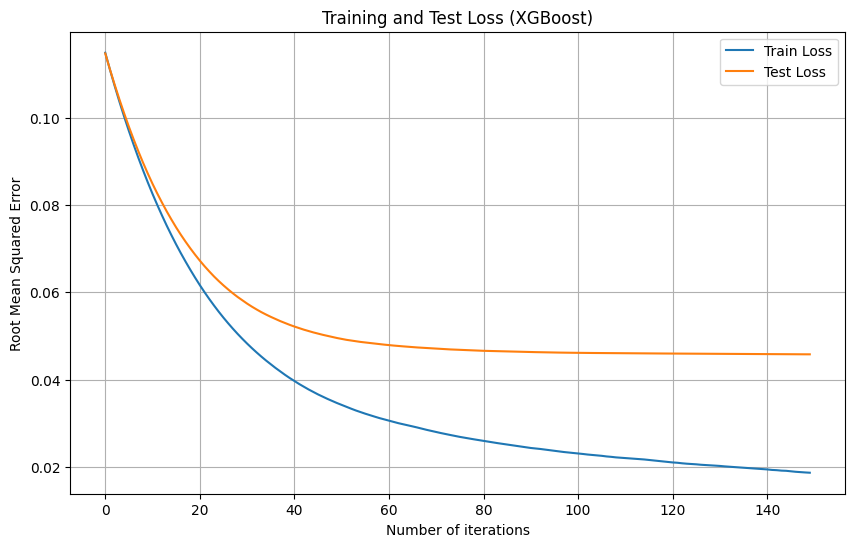

In [276]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have your X_train, y_train, X_test, and y_test data prepared

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(max_depth=13,  learning_rate=0.04 , n_estimators=150 ) #  n_estimators=150 , scale_pos_weight = 1
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the model with evaluation set
xgb_regressor.fit(X_train, y_train, eval_set=eval_set, eval_metric="rmse", verbose=False) #set verbose=True if you want to show al the results


# Extract training and validation loss from the model's history
results = xgb_regressor.evals_result()
train_loss = results['validation_0']['rmse']
test_loss = results['validation_1']['rmse']

# Plot the train and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Loss (XGBoost)')
plt.legend()
plt.grid()
plt.show()

In [123]:
#trying to grid search this
from sklearn.model_selection import GridSearchCV
# Instantiate model
model = xgb.XGBRegressor(n_estimators = 10)

# Hyperparameter Grid
grid = {
    'max_depth': [9, 10, 11],
    'learning_rate': [0.1, 0.05]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search.fit(X_train, y_train , eval_metric="rmse", verbose=False);



KeyboardInterrupt: 

In [ ]:
(search.best_score_  * -1) ** 0.5  #keep in mind: this gas less n_estimators than the definitive model

In [ ]:
search.best_params_

In [ ]:
search.best_estimator_

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
y_pred = xgb_regressor.predict(X_test)
#y_pred = model.predict(X_test)
y_pred

array([0.86652553, 0.90065324, 0.94266015, ..., 0.8604859 , 0.8836056 ,
       0.9484656 ], dtype=float32)

## Feature selection

In [126]:
from sklearn.inspection import permutation_importance


In [127]:
#preprocessor.get_feature_names_out()

In [ ]:

# Fit model
model = xgb_regressor.fit(X_train, y_train)

# Performs Permutation
permutation_score = permutation_importance(model, X_train, y_train, n_repeats=2)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((preprocessor.get_feature_names_out(),
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

After analisys with all features, I kept the following top features in the model:



```
ccalendar_year
Price R
Price_YoY
Car gearbox_Manual
Year_x
Length
Settings_Pickup truck
Width
Sidewall height
Price_sd_scaled
Car payload
Height
Doors
prev_1_Price_YoY
Acceleration
Trunk
Specific power
prev_2_Price_YoY
Cylinder diameter
Fuel tank
Weight/Torque
Specific torque
Max torque regime
Piston course
Fuel_Gasoline
Provenance
```



<Axes: >

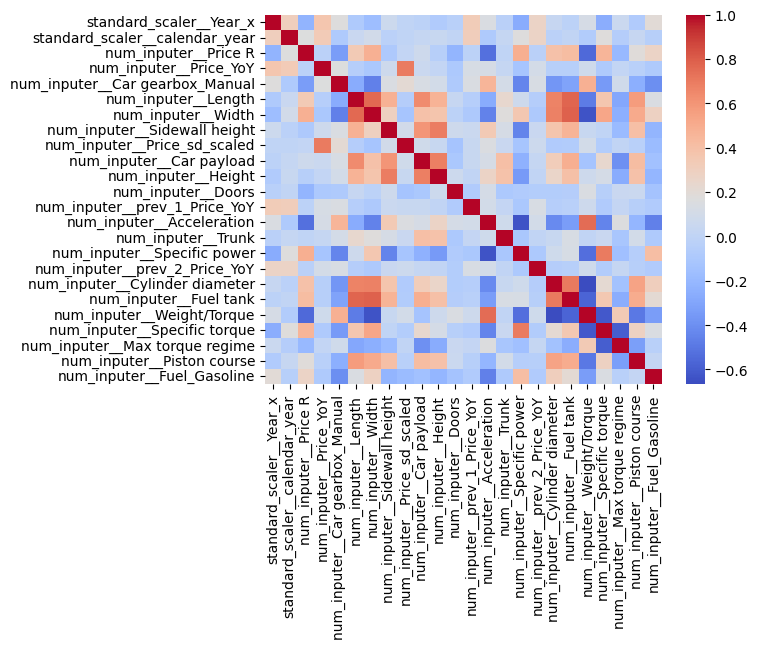

In [129]:
X_view = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X_view.drop(labels="num_inputer__Provenance", axis=1, inplace=True)
X_view.drop(labels="num_inputer__Settings_Pickup truck", axis=1, inplace=True)

X_view
sns.heatmap(pd.DataFrame(X_view).corr(), cmap='coolwarm')

## comparing model with naive model

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
y_pred = xgb_regressor.predict(X_test)
#y_pred = model.predict(X_test)
y_pred

array([0.86652553, 0.90065324, 0.94266015, ..., 0.8604859 , 0.8836056 ,
       0.9484656 ], dtype=float32)

In [132]:
mean_squared_error(y_test, y_pred) ** (0.5)   #model score: mean square error --> lower is better

0.045791410397664045

In [133]:
mean_squared_error(y_test, [y_test.mean()]*len(y_test)) ** (0.5)   #naive score: mean square error

0.11867745529323852

In [134]:
y_test.mean()

0.945500141932299

## Visualizing the errors

<Axes: xlabel='Next_YoY_Price', ylabel='Count'>

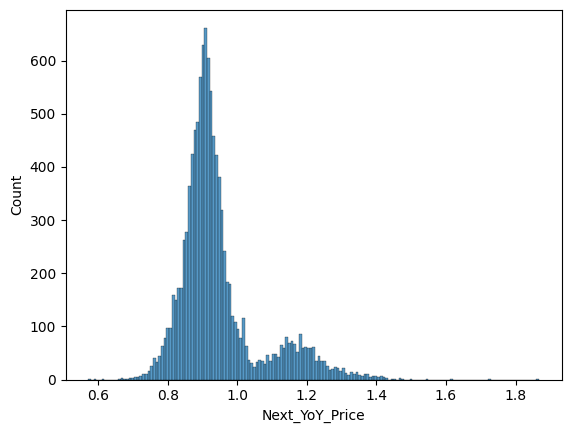

In [135]:
sns.histplot(y_test)

<Axes: ylabel='Count'>

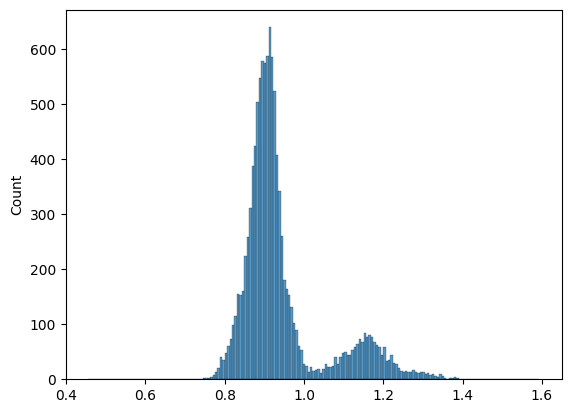

In [136]:
sns.histplot(y_pred)

<Axes: ylabel='Count'>

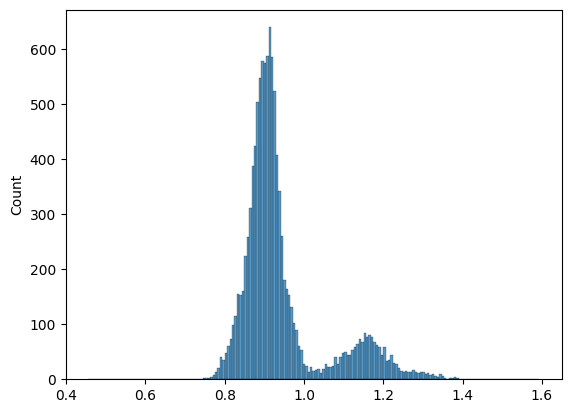

In [137]:
sns.histplot(y_pred )

In [138]:
X_view = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())


In [139]:
X_view["y_pred"] = (y_pred)

In [140]:
X_view["y_test"] = y_test.reset_index()["Next_YoY_Price"]

In [141]:
X_view["y_pred_error"] = X_view["y_test"] - X_view["y_pred"]

<Axes: xlabel='y_pred_error', ylabel='Count'>

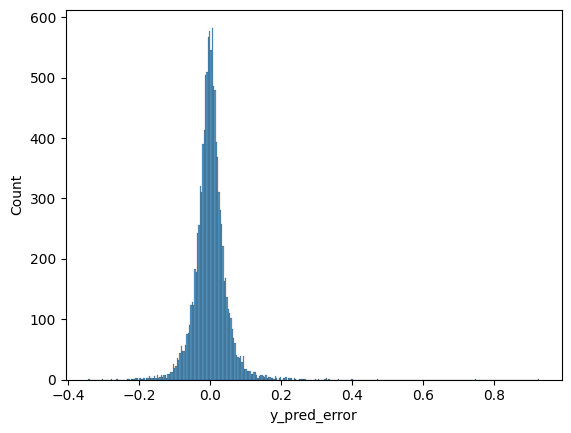

In [142]:
sns.histplot(X_view["y_pred_error"])

<Axes: xlabel='standard_scaler__Year_x', ylabel='y_pred_error'>

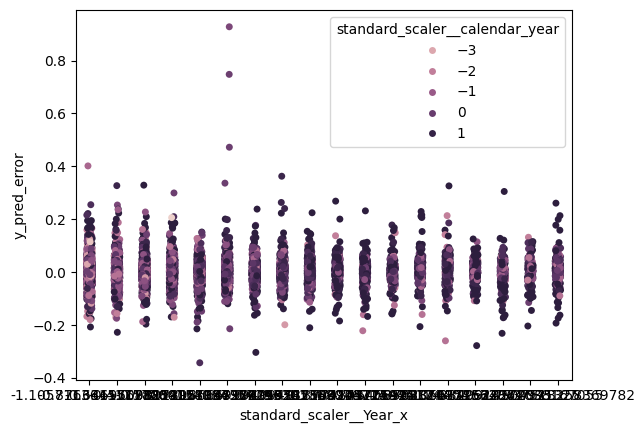

In [143]:
sns.stripplot(data=X_view, x="standard_scaler__Year_x", y="y_pred_error", hue="standard_scaler__calendar_year")

In [144]:
X_view.columns #["standard_scaler__Year_x"].nunique()

Index(['standard_scaler__Year_x', 'standard_scaler__calendar_year',
       'num_inputer__Price R', 'num_inputer__Price_YoY',
       'num_inputer__Car gearbox_Manual', 'num_inputer__Length',
       'num_inputer__Settings_Pickup truck', 'num_inputer__Width',
       'num_inputer__Sidewall height', 'num_inputer__Price_sd_scaled',
       'num_inputer__Car payload', 'num_inputer__Height', 'num_inputer__Doors',
       'num_inputer__prev_1_Price_YoY', 'num_inputer__Acceleration',
       'num_inputer__Trunk', 'num_inputer__Specific power',
       'num_inputer__prev_2_Price_YoY', 'num_inputer__Cylinder diameter',
       'num_inputer__Fuel tank', 'num_inputer__Weight/Torque',
       'num_inputer__Specific torque', 'num_inputer__Max torque regime',
       'num_inputer__Piston course', 'num_inputer__Fuel_Gasoline',
       'num_inputer__Provenance', 'y_pred', 'y_test', 'y_pred_error'],
      dtype='object')

## Saving the model for later usage

In [145]:
import pickle

filename = 'xgb_reg_model_V2.sav'
pickle.dump(xgb_regressor, open(filename, 'wb'))


#xgb_reg.save('xgb.h5')

# Simple tester

In [146]:
car = merged_df[merged_df["car_model_year"] > 2019 ] [merged_df["Next_YoY_Price"].isnull() == False] #[merged_df.index == 23575 ]
car = merged_df[merged_df.index == 26256 ]
car["Year_x"] = 2
car["calendar_year"] = 2023
car["Price_YoY"] = np.nan
car["Next_YoY_Price"] = np.nan
car["prev_1_Price_YoY"] = 1.046803
car["prev_2_Price_YoY"] =  0.949971

#car[["car_code", "car_manufacturer", "car_model_small", "Next_YoY_Price" ]]
car

<ipython-input-146-29c626c49f8a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  car = merged_df[merged_df["car_model_year"] > 2019 ] [merged_df["Next_YoY_Price"].isnull() == False] #[merged_df.index == 23575 ]
<ipython-input-146-29c626c49f8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["Year_x"] = 2
<ipython-input-146-29c626c49f8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["calendar_year"] = 2023
<ipython-input-146-29c626c49f8a>:5: SettingWithCopyWarning

,car_code,car_manufacturer,car_model_year,Year_x,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled,Propulsion_Combustion,...,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm,car_model_small,Next_Price_sd_scaled,prev_1_Price_YoY,prev_2_Price_YoY
26256,20498,Citroen,2020,2,NaN,NaN,0.917069,2023,1.718697,1.0,...,0.454545,0.173697,0.928571,1.0,1.0,1.0,C3,-1.05437,1.046803,0.949971


In [147]:
car = car.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price', 'Next_YoY_Pr_Pred' ])  #, 'Price_sd_scaled'


#X = merged_df.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price', 'Next_YoY_Pr_Pred',
#       'Price_sd_scaled' ])


#car["car_model_small"] = car["car_model"].map(take_first_word)
#car.drop(columns="car_model", inplace=True)
car

,car_manufacturer,Year_x,Price_YoY,calendar_year,Price_sd_scaled,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,...,Gear speed transmissions,Urban,Year_y,Radio,Folding rear seat,Perimeter anti theft alarm,car_model_small,Next_Price_sd_scaled,prev_1_Price_YoY,prev_2_Price_YoY
26256,Citroen,2,NaN,2023,1.718697,1.0,0.0,0.0,0.0,0.0,...,0.454545,0.173697,0.928571,1.0,1.0,1.0,C3,-1.05437,1.046803,0.949971


In [148]:
car_transformed = preprocessor.transform(car)

In [149]:
xgb_regressor.predict(car_transformed)

array([1.0877888], dtype=float32)

# Create Unique dataframe

*The unique dataframe must have:
- car code
- car manufacturer
- car model
- car model year
- expected price devaluation
- car code

In [674]:
car_features_df = pd.read_csv('/scaled_cleaned.csv')

In [675]:
car_prices_df = pd.read_csv("/car_prices_w_prices_scaled.csv")

In [676]:
car_prices_original_df = pd.read_csv("/car_prices_enriched_v2.csv")

In [677]:
time_serie_df = car_prices_original_df[['car_code', 'car_manufacturer', 'car_model',
                          'car_model_year',  'year_00_pc', 'year_01_yoy',
                          'year_02_yoy', 'year_03_yoy', 'year_04_yoy', 'year_05_yoy',
                          'year_06_yoy', 'year_07_yoy', 'year_08_yoy', 'year_09_yoy',
                          'year_10_yoy', 'year_11_yoy', 'year_12_yoy', 'year_13_yoy',
                          'year_14_yoy', 'year_15_yoy', 'year_16_yoy', 'year_17_yoy',
                          'year_18_yoy', 'year_19_yoy', 'year_20_yoy']]

In [678]:
car_prices_yoy_melted = pd.melt(time_serie_df, id_vars=['car_code', 'car_manufacturer', 'car_model', 'car_model_year'], value_vars=['year_01_yoy', 'year_02_yoy', 'year_03_yoy', 'year_04_yoy',
''                                                                                                                                    'year_05_yoy', 'year_06_yoy', 'year_07_yoy', 'year_08_yoy',
                                                                                                                                    'year_09_yoy', 'year_10_yoy', 'year_11_yoy', 'year_12_yoy',
                                                                                                                                    'year_13_yoy', 'year_14_yoy', 'year_15_yoy', 'year_16_yoy',
                                                                                                                                    'year_17_yoy', 'year_18_yoy', 'year_19_yoy', 'year_20_yoy'], var_name="Year", value_name="Price_YoY")
#Transforming years into integers

def transform_year_to_int(year_string):
    year_string = str(year_string)
    year_string = year_string.replace("year_", '').replace("_yoy", "")
    return int(year_string)

car_prices_yoy_melted["Year"] = car_prices_yoy_melted["Year"].map(
    transform_year_to_int)

In [679]:
car_prices_yoy_melted#[car_prices_yoy_melted["Price_YoY"] > 0]

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY
0,1,Lamborghini,Murcielago 6.2 V12,2002,1,NaN
1,2,Fiat,Uno Mille Fire 1.0,2002,1,NaN
2,3,Chevrolet,Astra Sport 2.0,2002,1,NaN
3,5,Volkswagen,Golf GTi 1.8 Turbo,2002,1,NaN
4,6,Fiat,Brava HGT 1.8 16V,2002,1,NaN
...,...,...,...,...,...,...
414055,23878,Hyundai,HB20 Limited 1.0,2024,20,NaN
414056,23883,Hyundai,HB20 Comfort 1.0 Turbo,2024,20,NaN
414057,23884,Hyundai,HB20 Comfort 1.0 Turbo AT,2024,20,NaN
414058,23885,Hyundai,HB20 Platinum 1.0 Turbo AT,2024,20,NaN


In [680]:
#including the next YoY price

car_prices_yoy_melted = car_prices_yoy_melted.sort_values(
    by=["car_code", "Year"])

car_prices_yoy_melted['Next_YoY_Price'] = car_prices_yoy_melted.groupby('car_code')[
    'Price_YoY'].shift(-1)

car_prices_yoy_melted["car_code"].nunique()

20703

In [681]:
#including the calendar year

car_prices_yoy_melted["calendar_year"] = car_prices_yoy_melted["car_model_year"] + car_prices_yoy_melted["Year"]
#car_prices_yoy_melted = car_prices_yoy_melted[car_prices_yoy_melted["Price_YoY"] > 0]
car_prices_yoy_melted

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,calendar_year
0,1,Lamborghini,Murcielago 6.2 V12,2002,1,NaN,NaN,2003
20703,1,Lamborghini,Murcielago 6.2 V12,2002,2,NaN,NaN,2004
41406,1,Lamborghini,Murcielago 6.2 V12,2002,3,NaN,NaN,2005
62109,1,Lamborghini,Murcielago 6.2 V12,2002,4,NaN,NaN,2006
82812,1,Lamborghini,Murcielago 6.2 V12,2002,5,NaN,NaN,2007
...,...,...,...,...,...,...,...,...
331247,23893,Hyundai,HB20 Platinum Plus 1.0 Turbo AT,2024,16,NaN,NaN,2040
351950,23893,Hyundai,HB20 Platinum Plus 1.0 Turbo AT,2024,17,NaN,NaN,2041
372653,23893,Hyundai,HB20 Platinum Plus 1.0 Turbo AT,2024,18,NaN,NaN,2042
393356,23893,Hyundai,HB20 Platinum Plus 1.0 Turbo AT,2024,19,NaN,NaN,2043


In [682]:
car_prices_yoy_melted = car_prices_yoy_melted[car_prices_yoy_melted["Price_YoY"] > 0]

In [683]:
#selected_observations = car_prices_yoy_melted[car_prices_yoy_melted["Price_YoY"] > 0 ].sort_values(["Year"], ascending= False)[car_prices_yoy_melted["car_code"] == 375].head(3)#.iloc[2]["Price_YoY"]

In [684]:
#selected_observations

In [685]:
#car = selected_observations.head(1)
#car.rename(columns={"Year": "Year_x"}, inplace= True)
#car["prev_1_Price_YoY"] = selected_observations.iloc[1]["Price_YoY"]
#car["prev_2_Price_YoY"] =   selected_observations.iloc[2]["Price_YoY"]
#car['Price_sd_scaled'] = np.nan

In [686]:
#merged_car_df = car.merge(car_features_df, left_on="car_code", right_on="car_code", how="left")
#merged_car_df

In [687]:
#car = merged_car_df.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price' ])  #, 'Price_sd_scaled'


In [688]:
#def take_first_word(word):
#    return word.split(" ")[0]

#car["car_model_small"] = car["car_model"].map(take_first_word)
#car

In [689]:
#car_transformed = preprocessor.transform(car)

In [690]:
#xgb_regressor.predict(car_transformed)

In [763]:
car_features_pr_pred_df =  car_features_df.copy()
car_features_pr_pred_df["price_pred"] = np.nan
car_features_pr_pred_df["car_manufacturer"] = np.nan
car_features_pr_pred_df["car_model"] = np.nan
car_features_pr_pred_df["car_model_year"] = np.nan

car_features_pr_pred_to_save = car_features_pr_pred_df[car_features_pr_pred_df["car_code"] == 99999].copy()

In [ ]:
def take_first_word(word):
    return word.split(" ")[0]

for car_code in car_prices_yoy_melted["car_code"].unique():
  selected_code = car_code
  selected_observations = car_prices_yoy_melted[car_prices_yoy_melted["Price_YoY"] > 0 ].sort_values(["Year"], ascending= False)[car_prices_yoy_melted["car_code"] == selected_code].head(3)#.iloc[2]["Price_YoY"]

  car = selected_observations.head(1)
  car.loc[:,"calendar_year"] = 2023
  car.rename(columns={"Year": "Year_x"}, inplace= True)

  if len(selected_observations) == 3:
    car["prev_1_Price_YoY"] = selected_observations.iloc[1]["Price_YoY"]
    car["prev_2_Price_YoY"] =   selected_observations.iloc[2]["Price_YoY"]
  elif len(selected_observations) == 2:
    car["prev_1_Price_YoY"] = selected_observations.iloc[1]["Price_YoY"]
    car["prev_2_Price_YoY"] = np.nan #   selected_observations.iloc[1]["Price_YoY"]
  elif len(selected_observations) == 1:
    car["prev_1_Price_YoY"] =  np.nan # selected_observations.iloc[1]["Price_YoY"]
    car["prev_2_Price_YoY"] = np.nan #   selected_observations.iloc[1]["Price_YoY"]



  car.loc[:,'Price_sd_scaled'] = np.nan

  car_model_year = car.iloc[0]["car_model_year"]

  merged_car_df = car.merge(car_features_df, left_on="car_code", right_on="car_code", how="left")

  car = merged_car_df.drop( columns=['car_code' , 'car_model_year',  'Next_YoY_Price' ])

  car.loc[:,"car_model_small"] = car["car_model"].map(take_first_word)
  car
  car_transformed = preprocessor.transform(car)
  price_pred = xgb_regressor.predict(car_transformed)

  car_features_pr_pred = car_features_pr_pred_df[car_features_pr_pred_df['car_code'] == selected_code]
  car_features_pr_pred.loc[:, "price_pred"] = price_pred
  car_features_pr_pred.loc[:, "car_manufacturer"] = car.iloc[0]["car_manufacturer"]
  car_features_pr_pred.loc[:, "car_model"] = car.iloc[0]["car_model"]
  car_features_pr_pred.loc[:, "car_model_year"] = car_model_year

  car_features_pr_pred_to_save = car_features_pr_pred_to_save.append( car_features_pr_pred  )


Streaming output truncated to the last 5000 lines.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features_pr_pred.loc[:, "price_pred"] = price_pred
<ipython-input-764-e3360d863cb4>:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  car_features_pr_pred.loc[:, "price_pred"] = price_pred
<ipython-input-764-e3360d863cb4>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_

In [ ]:
car_features_pr_pred_df[car_features_pr_pred_df['car_code'] == 4000]

In [ ]:
car_features_pr_pred_to_save.to_csv("car_features_pr_pred.csv")